In [1]:
# --data description
# this data is of 'New York City Airbnb Open Data'
# link to the data: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data
# here the basic goal is to extract some statistical conclusions

#### importing necessary libraries

In [2]:
import pandas as pd
# pd.set_option('display.max_columns', None) # for diplaying all columns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # for advanced plotting
%config InlineBackend.figure_formats = ['svg'] # for clear inline plots
import warnings
warnings.filterwarnings('ignore') # stop displaying warnings

# for printing colored text as headings
from termcolor import colored 
def cm(txt):
    formatted_txt = colored('--{}--'.format(txt), 'blue', attrs=['bold'])
    print(formatted_txt)

#### load data to python environment

In [3]:
df = pd.read_csv('data.csv') # --data loaded to data frame
display(df[0 : 5])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### analysis

#### which neighbourhood groups has how many listings?

,neighbourhood_group,no_of_listings
0,Manhattan,21661
1,Brooklyn,20104
2,Queens,5666
3,Bronx,1091
4,Staten Island,373


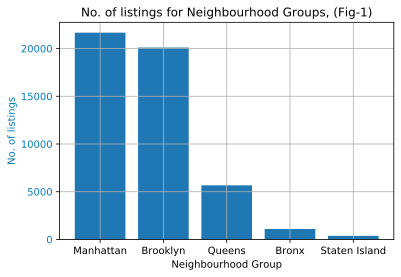

In [13]:
# --assigning the data to a new data frame
df_2 = df.sort_values(by = ['neighbourhood_group']) # --sort by 'neighbourhood_group'
df_2.reset_index(inplace = True, drop = True) # --reset index of new data frame

# --make a count of each neighbourhood_group
neighbourhood_group = df_2['neighbourhood_group']
counts = neighbourhood_group.value_counts()
neighbourhood_group = counts.index
no_of_listings = counts
list_of_tuples = list(zip(neighbourhood_group, no_of_listings)) 
df_nh_count = pd.DataFrame(list_of_tuples, columns = ['neighbourhood_group', 'no_of_listings']) 
display(df_nh_count)
print()

# --defining graph variables
x = df_nh_count['neighbourhood_group']
y = df_nh_count['no_of_listings']

color = '#047aba'
plt.bar(x, y)
plt.title('No. of listings for Neighbourhood Groups, (Fig-1)')
plt.xlabel('Neighbourhood Group')
plt.ylabel('No. of listings', color = color)
plt.tick_params(axis = 'y', labelcolor = color)
plt.grid()
plt.show()

#### which neighbourhood group has how many reviews?

,neighbourhood_group,number_of_reviews
1,Brooklyn,486574
2,Manhattan,454569
3,Queens,156950
0,Bronx,28371
4,Staten Island,11541


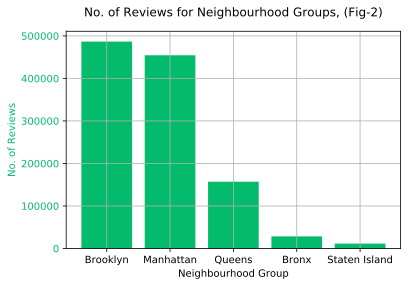

In [12]:
# --assigning the data to a new data frame
df_3 = df.sort_values(by = ['neighbourhood_group']) # --sort by 'neighbourhood_group'
df_3.reset_index(inplace = True, drop = True) # --reset index of new data frame

# --add up all number of reviews for same neighbourhood_group
df_new = df_3[['neighbourhood_group', 'number_of_reviews']]
df_reviews_sum = df_new.groupby(['neighbourhood_group'], as_index = False).sum()
df_reviews_sum_sorted = df_reviews_sum.sort_values(by = ['number_of_reviews'], ascending = False)
display(df_reviews_sum_sorted)
print()

# --defining graph variables
x = df_reviews_sum_sorted['neighbourhood_group']
y = df_reviews_sum_sorted['number_of_reviews']

color = '#04ba6b'
plt.bar(x, y, color = color)
plt.title('No. of Reviews for Neighbourhood Groups, (Fig-2)', pad = 15)
plt.xlabel('Neighbourhood Group')
plt.ylabel('No. of Reviews', color = color)
plt.tick_params(axis = 'y', labelcolor = color)
plt.grid()
plt.show()

,neighbourhood_group,no_of_listings,number_of_reviews
0,Bronx,1091,28371
1,Brooklyn,20104,486574
2,Manhattan,21661,454569
3,Queens,5666,156950
4,Staten Island,373,11541


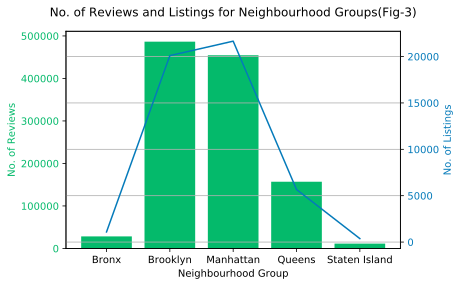

In [16]:
# --merging fig-1 and fig-2
fig_1_data = df_nh_count.sort_values(by = ['neighbourhood_group'])
fig_1_data.reset_index(inplace = True, drop = True)
fig_2_data = df_reviews_sum_sorted.sort_values(by = ['neighbourhood_group'])
fig_2_data.reset_index(inplace = True, drop = True)
df_fig_1_2 = pd.concat([fig_1_data, fig_2_data['number_of_reviews']], axis = 1)
display(df_fig_1_2)

# --definning graph varibles
x = df_fig_1_2['neighbourhood_group']
y = df_fig_1_2['no_of_listings']
z = df_fig_1_2['number_of_reviews']

fig, ax1 = plt.subplots()

color = '#04ba6b'
ax1.bar(x, z, color = color)
ax1.set_title('No. of Reviews and Listings for Neighbourhood Groups(Fig-3)', pad = 15)
ax1.set_xlabel('Neighbourhood Group')
ax1.set_ylabel('No. of Reviews', color = color)
ax1.tick_params(axis = 'y', labelcolor = color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = '#047aba'
ax2.plot(x, y, color = color)
ax2.set_ylabel('No. of Listings', color = color)
ax2.tick_params(axis = 'y', labelcolor = color)
plt.grid()
plt.show()

#### what is the no. of reviews for different hosts?

,host_id,number_of_reviews
0,37312959,2273
1,344035,2205
2,26432133,2017
3,35524316,1971
4,40176101,1818
...,...,...
37452,140338526,0
37453,24508767,0
37454,140323391,0
37455,140312311,0


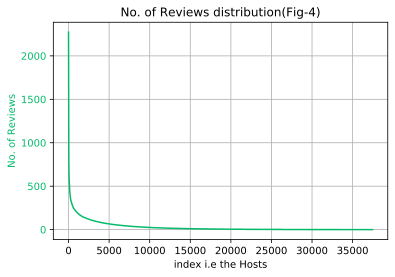

In [9]:
# --assigning the data to a new data frame
df_4 = df.sort_values(by = ['host_id']) # --sort by 'neighbourhood_group'
df_4.reset_index(inplace = True, drop = True) # --reset index of new data frame

# --add up all number of reviews for same host_id
df_new = df_4[['host_id', 'number_of_reviews']]
df_reviews_sum = df_new.groupby(['host_id'], as_index = False).sum()
df_reviews_sum_sorted = df_reviews_sum.sort_values(by = ['number_of_reviews'], ascending = False)
df_reviews_sum_sorted.reset_index(inplace = True, drop = True)
display(df_reviews_sum_sorted)
print()

# --defining graph variables
x = np.array(df_reviews_sum_sorted.index)
y = df_reviews_sum_sorted['number_of_reviews']

color = '#04ba6b'
plt.plot(x, y, color = color)
plt.title('No. of Reviews distribution(Fig-4)')
plt.xlabel('index i.e the Hosts')
plt.ylabel('No. of Reviews', color = color)
plt.tick_params(axis = 'y', labelcolor = color)
plt.grid()
plt.show()

##### A lot of conclusions can be drawn just by looking on the above graphs, I am not gonna mention the conclusions as there can be many based on which way you think mostly taken by the business oweners. These conclusions can lead them to make action plans for business growth and taking serious or major decissions.